# Machine  Learning model Build

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error
from math import sqrt

pd.pandas.set_option('display.max_columns', None)

/Users/Roberto_Terceros/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/Roberto_Terceros/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/Roberto_Terceros/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/Roberto_Terceros/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')
X_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,530,12.209188,0.000000,0.75,0.388581,0.630999,1.0,1.0,0.333333,0.333333,1.0,1.0,0.0,0.727273,0.4,1.0,0.75,0.6,0.555556,0.250,0.367647,0.540984,1.0,0.0,0.1,0.5,0.333333,0.000000,0.666667,1.0,1.0,0.50,0.75,0.25,0.166667,0.215982,0.666667,0.00000,0.379006,0.333061,1.0,0.5,1.0,1.000000,0.764014,0.000000,0.0,0.714182,0.333333,0.0,1.000000,0.0,0.500,0.666667,0.333333,0.583333,0.0,0.666667,0.6,0.8,0.299065,0.666667,0.50,0.341326,0.666667,1.0,1.0,0.000000,0.000000,0.362319,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.181818,0.25,0.666667,0.00,1.0,1.0,0.0
1,492,11.798104,0.176471,0.75,0.490408,0.389061,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.363636,0.0,1.0,0.75,0.2,0.555556,0.750,0.477941,0.934426,0.0,0.0,0.1,0.1,0.000000,0.000000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.071403,0.500000,0.11194,0.110543,0.131915,1.0,0.5,1.0,0.666667,0.398758,0.331197,0.0,0.549294,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.000000,0.250000,1.0,0.666667,0.6,0.8,0.607477,0.333333,0.25,0.169252,0.666667,1.0,1.0,0.000000,0.000000,0.057971,0.0,0.0,0.0,0.0,0.50,1.0,0.0,0.636364,0.00,0.666667,0.75,0.0,0.0,0.0
2,460,11.608236,0.176471,0.75,0.388581,0.329918,1.0,1.0,0.333333,0.000000,1.0,0.5,0.0,0.181818,0.4,1.0,0.75,0.2,0.444444,0.375,0.433824,0.983607,0.0,0.0,0.3,0.2,0.333333,0.100625,0.333333,1.0,0.5,0.50,0.75,0.25,0.500000,0.032778,0.666667,0.00000,0.243381,0.116039,1.0,0.5,1.0,1.000000,0.406964,0.119658,0.0,0.453307,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.6,0.4,0.551402,0.333333,0.25,0.248237,0.666667,1.0,1.0,0.000000,0.000000,0.449275,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,1.0,0.0,0.0
3,280,12.165251,0.235294,0.75,0.508690,0.399404,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.772727,0.4,1.0,0.75,1.0,0.666667,0.500,0.227941,0.524590,1.0,0.0,0.7,0.7,0.666667,0.186875,0.333333,1.0,0.5,0.75,0.75,0.25,0.333333,0.069454,0.666667,0.00000,0.356712,0.189853,1.0,1.0,1.0,1.000000,0.469855,0.462607,0.0,0.636999,0.000000,0.0,0.666667,0.5,0.500,0.333333,0.333333,0.500000,1.0,0.333333,0.6,0.8,0.289720,1.000000,0.50,0.356135,0.666667,1.0,1.0,0.336056,0.213894,0.000000,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.181818,0.50,0.666667,0.75,0.0,0.0,0.0
4,656,11.385092,0.823529,0.25,0.000000,0.050188,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.090909,0.4,1.0,0.50,1.0,0.555556,0.500,0.286765,0.655738,0.0,0.0,0.6,0.5,0.666667,0.238125,0.333333,1.0,0.5,0.50,0.75,0.25,0.833333,0.000000,0.666667,0.00000,0.243846,0.085925,1.0,0.5,1.0,1.000000,0.171149,0.302885,0.0,0.419061,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.333333,0.333333,1.0,0.000000,0.2,0.4,0.364486,0.333333,0.25,0.186178,0.666667,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.181818,1.00,0.666667,0.50,0.0,0.0,0.0


In [5]:
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']


In [6]:
features = pd.read_csv('selected_features.csv', header=None)
features = [x for x in features[0]]

features = features + ['LotFrontage']

features

['MSSubClass',
 'Neighborhood',
 'OverallQual',
 'YearBuilt',
 'RoofStyle',
 'MasVnrType',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'LotFrontage']

In [7]:
X_train = X_train[features]
X_test = X_test[features]

In [8]:
# Regularised linear model
lin_model = Lasso(alpha=0.005, random_state=0)
lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
pred = lin_model.predict(X_train)
print('linear train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(pred))))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print()
pred = lin_model.predict(X_test)
print('linear train mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(pred))))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print()
print('Average house price: ', np.exp(y_train).median())

linear train mse: 1223715909.4922574
linear train rmse: 34981.65104011326

linear train mse: 1234382871.551843
linear train rmse: 35133.785329107974

Average house price:  161199.99999999977


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

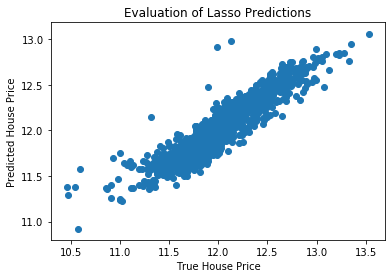

In [11]:
# Let's compare our predictions to the original price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

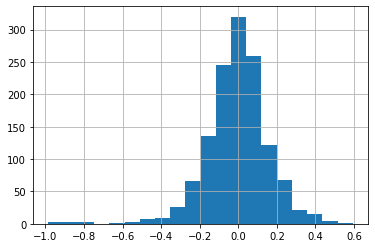

In [13]:
errors = y_test - lin_model.predict(X_test)
errors.hist(bins=20)

Text(0.5, 1.0, 'Features Importance')

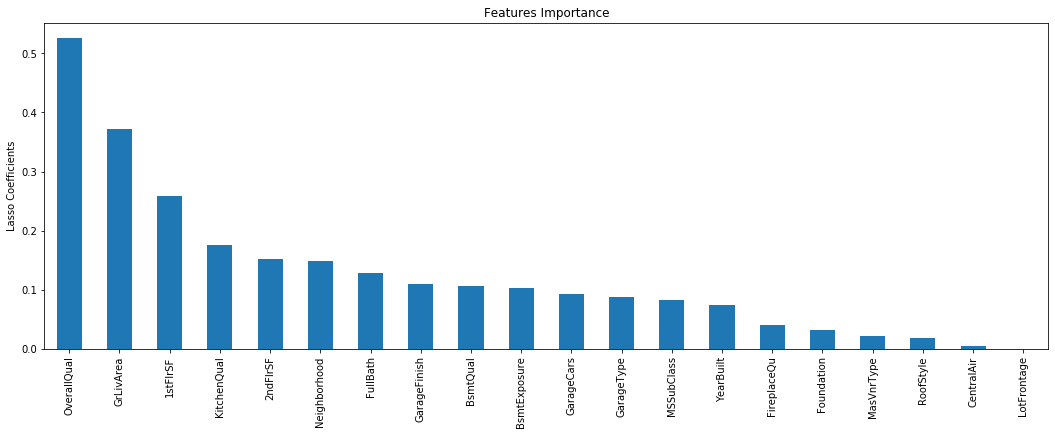

In [14]:
# Feature importance
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Features Importance')